# Covid Tracker 

This program uses JHU and covid tracking project data to keep track of new cases, deaths and hospitalizations due to covid-19.  It also makes some simple predictions to give an idea of where we are heading in terms of deaths.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
death=pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv')
usadeath=pd.DataFrame(death.loc[death['Country/Region'].str.contains('US')])
usadeath=usadeath.drop(columns=['Province/State','Country/Region','Lat','Long']).T
usadeath.columns=['DeathTotal']
usadeath['NewDeath']=usadeath['DeathTotal'].diff(1)
usadeath.tail(14)

,DeathTotal,NewDeath
1/18/21,399033,1405.0
1/19/21,401807,2774.0
1/20/21,406184,4377.0
1/21/21,410387,4203.0
1/22/21,414147,3760.0
1/23/21,417476,3329.0
1/24/21,419251,1775.0
1/25/21,421168,1917.0
1/26/21,425252,4084.0
1/27/21,429195,3943.0


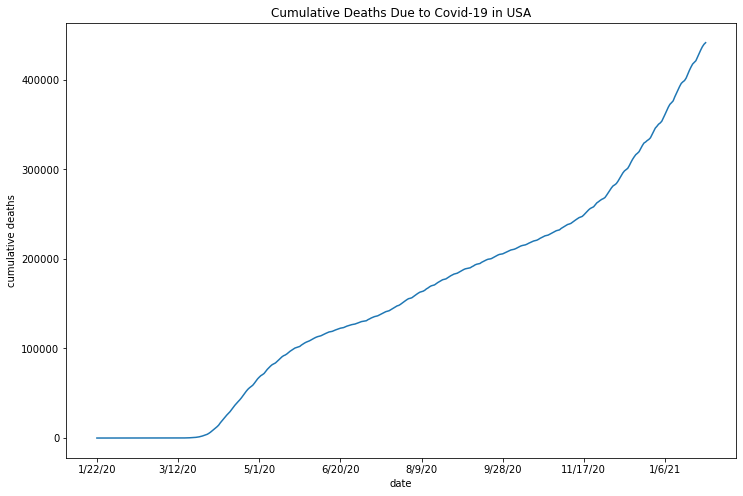

In [3]:
usadeath.DeathTotal.plot()
plt.ylabel('cumulative deaths')
plt.xlabel('date')
plt.title('Cumulative Deaths Due to Covid-19 in USA')
plt.show()

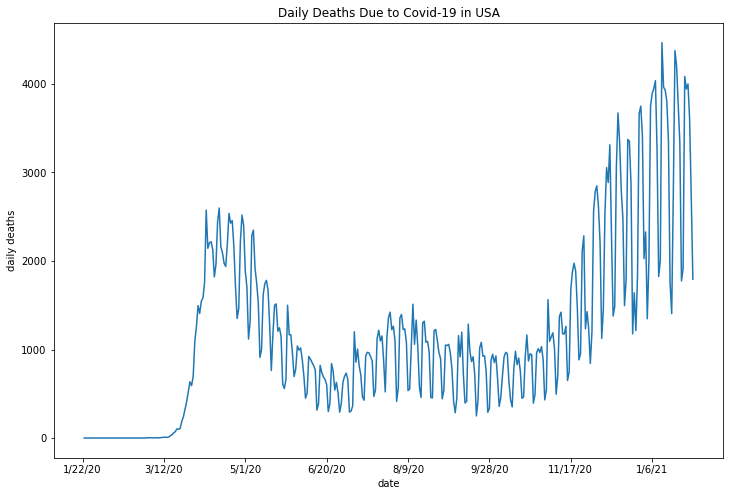

In [4]:
usadeath.NewDeath.plot()
plt.ylabel('daily deaths')
plt.xlabel('date')
plt.title('Daily Deaths Due to Covid-19 in USA')
plt.show()

In [5]:
#Day with max reported deaths 
usadeath[['NewDeath']].loc[usadeath.NewDeath==usadeath.NewDeath.max()]

,NewDeath
1/12/21,4466.0


In [6]:
#Last 2 weeks of rolling 14 day average of daily deaths due to Covid-19
usadeath.NewDeath.rolling(14).mean().tail(14)

1/18/21    3241.500000
1/19/21    3171.785714
1/20/21    3206.571429
1/21/21    3224.642857
1/22/21    3204.857143
1/23/21    3210.428571
1/24/21    3206.928571
1/25/21    3200.571429
1/26/21    3173.285714
1/27/21    3171.785714
1/28/21    3176.785714
1/29/21    3162.428571
1/30/21    3118.071429
1/31/21    3121.142857
Name: NewDeath, dtype: float64

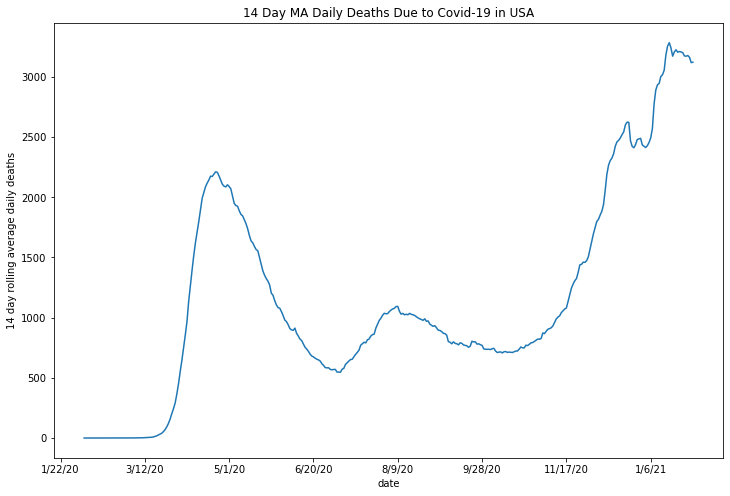

In [7]:
usadeath.NewDeath.rolling(14).mean().plot()
plt.ylabel('14 day rolling average daily deaths')
plt.xlabel('date')
plt.title('14 Day MA Daily Deaths Due to Covid-19 in USA')
plt.show()

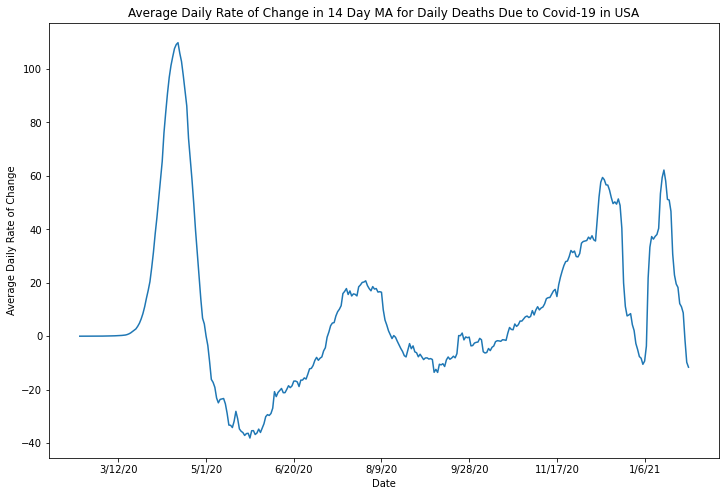

In [8]:
usadeath.NewDeath.rolling(14).mean().diff().rolling(14).mean().plot()
plt.ylabel('Average Daily Rate of Change')
plt.xlabel('Date')
plt.title('Average Daily Rate of Change in 14 Day MA for Daily Deaths Due to Covid-19 in USA')
plt.show()

In [9]:
cases=pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv')
usacases=pd.DataFrame(cases.loc[cases['Country/Region'].str.contains('US')])
usacases=usacases.drop(columns=['Province/State','Country/Region','Lat','Long']).T
usacases.columns=['CaseTotal']
usacases['NewCases']=usacases['CaseTotal'].diff(1)
usacases.tail(14)

,CaseTotal,NewCases
1/18/21,24104028,142605.0
1/19/21,24281012,176984.0
1/20/21,24463591,182579.0
1/21/21,24656646,193055.0
1/22/21,24846678,190032.0
1/23/21,25016816,170138.0
1/24/21,25147891,131075.0
1/25/21,25298986,151095.0
1/26/21,25445583,146597.0
1/27/21,25598061,152478.0


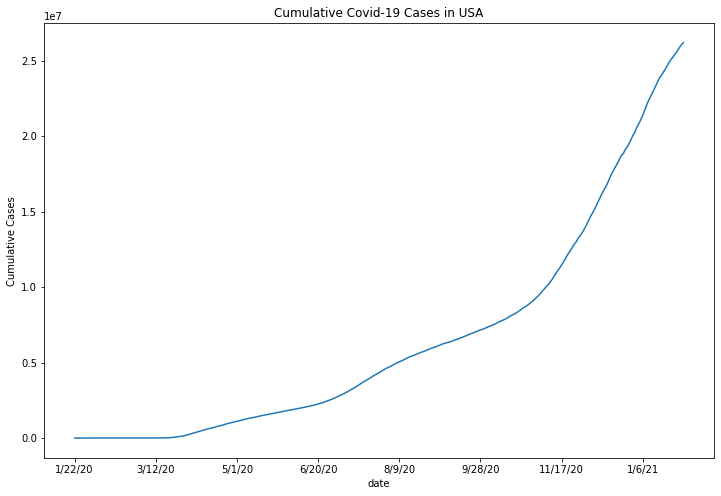

In [10]:
usacases.CaseTotal.plot()
plt.ylabel('Cumulative Cases')
plt.xlabel('date')
plt.title('Cumulative Covid-19 Cases in USA')
plt.show()

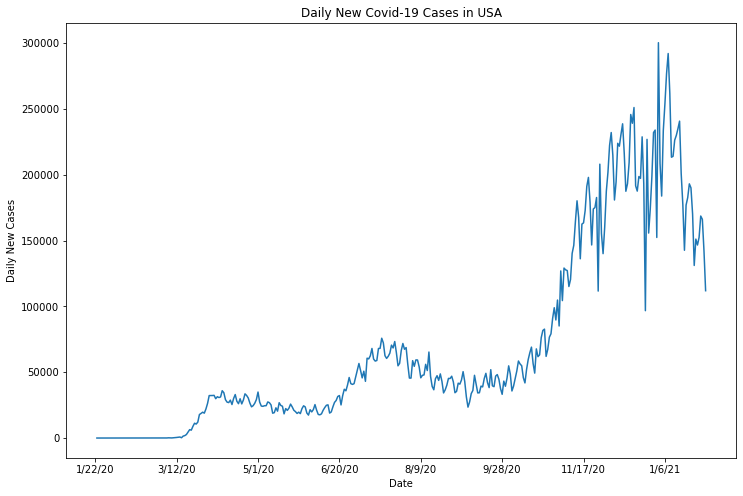

In [11]:
usacases.NewCases.plot()
plt.ylabel('Daily New Cases')
plt.xlabel('Date')
plt.title('Daily New Covid-19 Cases in USA')
plt.show()

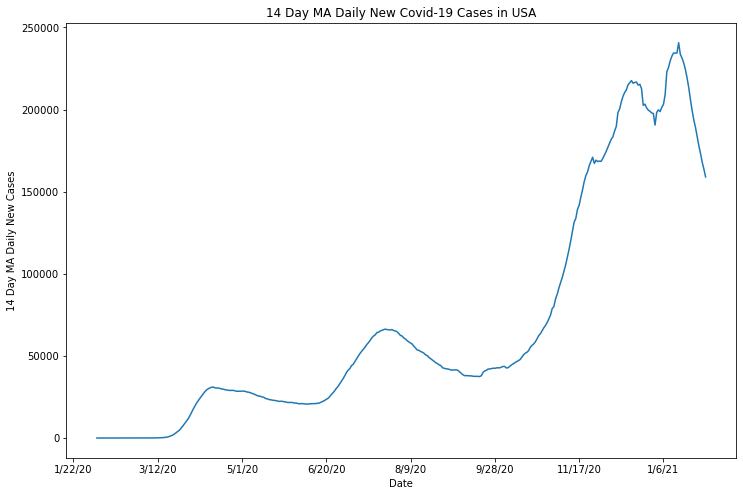

In [12]:
usacases.NewCases.rolling(14).mean().plot()
plt.ylabel('14 Day MA Daily New Cases')
plt.xlabel('Date')
plt.title('14 Day MA Daily New Covid-19 Cases in USA')
plt.show()

In [28]:
usacases.NewCases.rolling(14).mean().tail(14)

1/18/21    228429.071429
1/19/21    224390.357143
1/20/21    219294.785714
1/21/21    213317.428571
1/22/21    206030.857143
1/23/21    199471.142857
1/24/21    193599.285714
1/25/21    189108.714286
1/26/21    183420.071429
1/27/21    177892.000000
1/28/21    173152.357143
1/29/21    167824.214286
1/30/21    163633.285714
1/31/21    158954.142857
Name: NewCases, dtype: float64

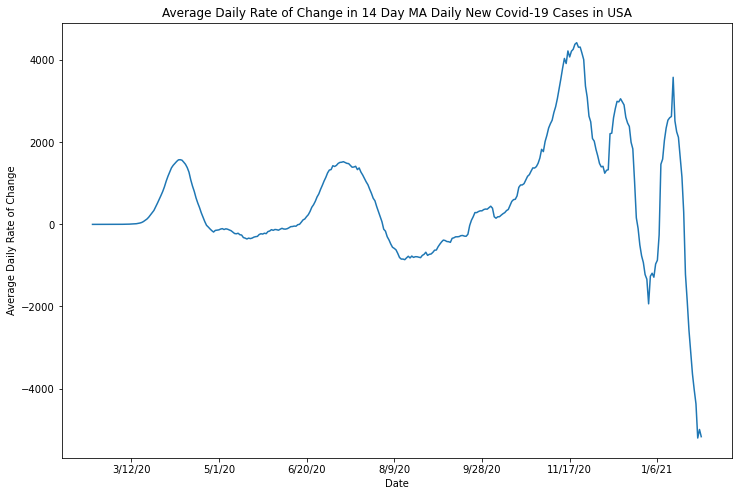

In [14]:
#Rate of change for Cases
usacases.NewCases.rolling(14).mean().diff().rolling(14).mean().plot()
plt.ylabel('Average Daily Rate of Change')
plt.xlabel('Date')
plt.title('Average Daily Rate of Change in 14 Day MA Daily New Covid-19 Cases in USA')
plt.show()

### Hospitalizations

In [15]:
usahospital=pd.read_csv('https://api.covidtracking.com/v1/us/daily.csv')
usahospital=usahospital.hospitalizedCurrently.values.reshape(-1)[::-1]
usahospital=pd.DataFrame(usahospital)
usahospital.columns=['hospitalizedCurrently']
usahospital.tail(14)

,hospitalizedCurrently
371,123848.0
372,123820.0
373,122700.0
374,119949.0
375,116264.0
376,113609.0
377,110628.0
378,109936.0
379,108960.0
380,107444.0


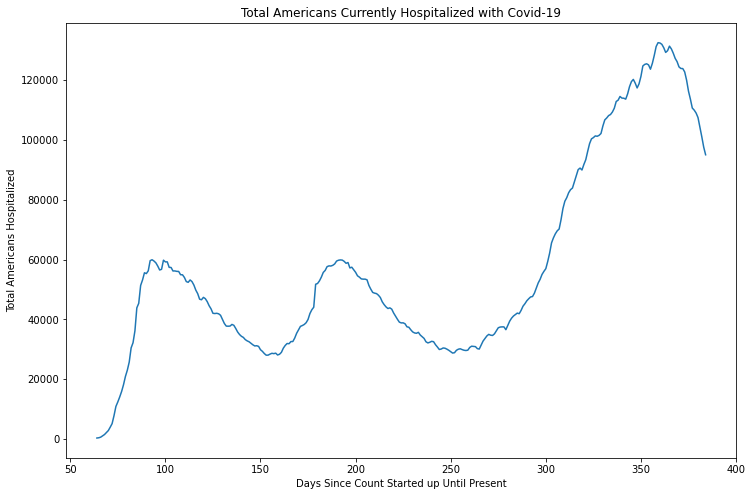

In [16]:
plt.plot(usahospital.hospitalizedCurrently)
plt.ylabel('Total Americans Hospitalized')
plt.xlabel('Days Since Count Started up Until Present')
plt.title('Total Americans Currently Hospitalized with Covid-19')
plt.show()

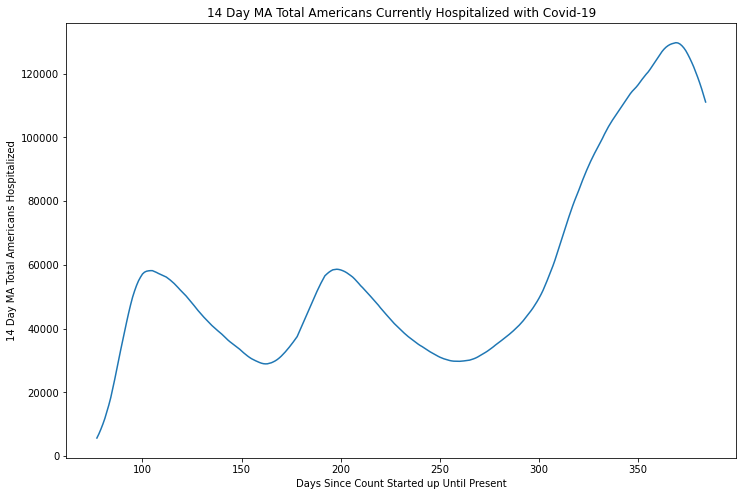

In [17]:
plt.plot(usahospital.hospitalizedCurrently.rolling(14).mean())
plt.ylabel('14 Day MA Total Americans Hospitalized')
plt.xlabel('Days Since Count Started up Until Present')
plt.title('14 Day MA Total Americans Currently Hospitalized with Covid-19')
plt.show()

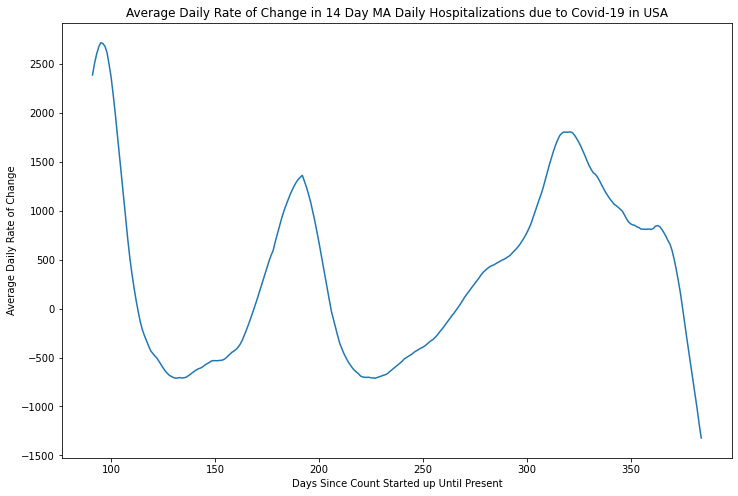

In [18]:
usahospital.hospitalizedCurrently.rolling(14).mean().diff().rolling(14).mean().plot()
plt.ylabel('Average Daily Rate of Change')
plt.xlabel('Days Since Count Started up Until Present')
plt.title('Average Daily Rate of Change in 14 Day MA Daily Hospitalizations due to Covid-19 in USA')
plt.show()

# MODEL USING HOSPITALIZATIONS

In [19]:
x=usahospital.tail(341).reset_index().drop(columns=['index'])
y=usadeath[['NewDeath']].tail(341).reset_index()
y.columns=['Date','NewDeath']
df=x.join(y).set_index('Date')
df.index=pd.to_datetime(df.index)
df.columns=['CurrentHospital','NewDeath']

In [20]:
df['Rolling14D']=df.NewDeath.rolling(14).sum()
df['Rolling14H']=df.CurrentHospital.rolling(14).sum()
df['pred21_25']=df['Rolling14H']*(.03)
predictions=df[['pred21_25']]
predictions.index=predictions.index.shift(periods=24,freq='D')
final=predictions.join(df.drop(['pred21_25'],axis=1),how='inner')

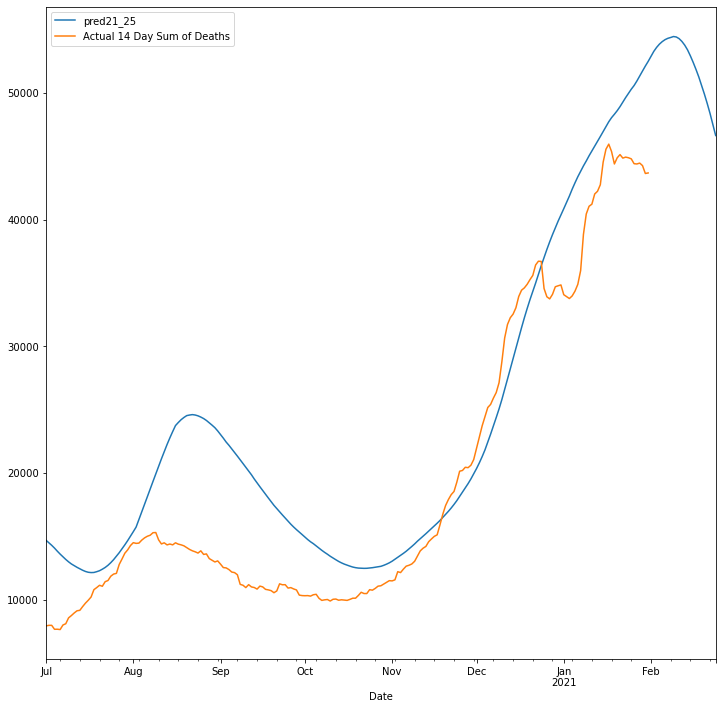

In [21]:
plt.rcParams['figure.figsize'] = [12, 12]
predictions.dropna().loc['2020-07-01':].plot(label='predicted')
final['Rolling14D'].loc['2020-07-01':].plot(label='Actual 14 Day Sum of Deaths')
plt.legend(loc='upper left')
plt.show()

In [22]:
final[['pred21_25','Rolling14D']].tail(21)

,pred21_25,Rolling14D
Date,,
2021-01-11,45431.28,41230.0
2021-01-12,45812.94,42033.0
2021-01-13,46175.94,42248.0
2021-01-14,46573.02,42765.0
2021-01-15,46967.22,44543.0
2021-01-16,47350.98,45567.0
2021-01-17,47737.98,45971.0
2021-01-18,48063.39,45381.0
2021-01-19,48329.88,44405.0


In [23]:
#Hospital model predictions next 21 days
from datetime import date
predictions[['pred21_25']].loc[date.today():].head(21)

,pred21_25
Date,
2021-02-01,52889.64
2021-02-02,53292.75
2021-02-03,53607.84
2021-02-04,53865.57
2021-02-05,54064.77
2021-02-06,54219.90
2021-02-07,54325.62
2021-02-08,54391.26
2021-02-09,54467.01


#  MODEL USING CASES

In [24]:
df=usacases.join(usadeath)
df=df.drop(['CaseTotal','DeathTotal'],axis=1)
df['Rolling14D']=df.NewDeath.rolling(14).sum()
df['Rolling14C']=df.NewCases.rolling(14).sum()
df.index=pd.to_datetime(df.index)
df['pred24_18']=df['Rolling14C']*(.018)
predictions=df[['pred24_18']]
predictions.index=predictions.index.shift(periods=21,freq='D')
final=predictions.join(df.drop(['pred24_18'],axis=1),how='inner')

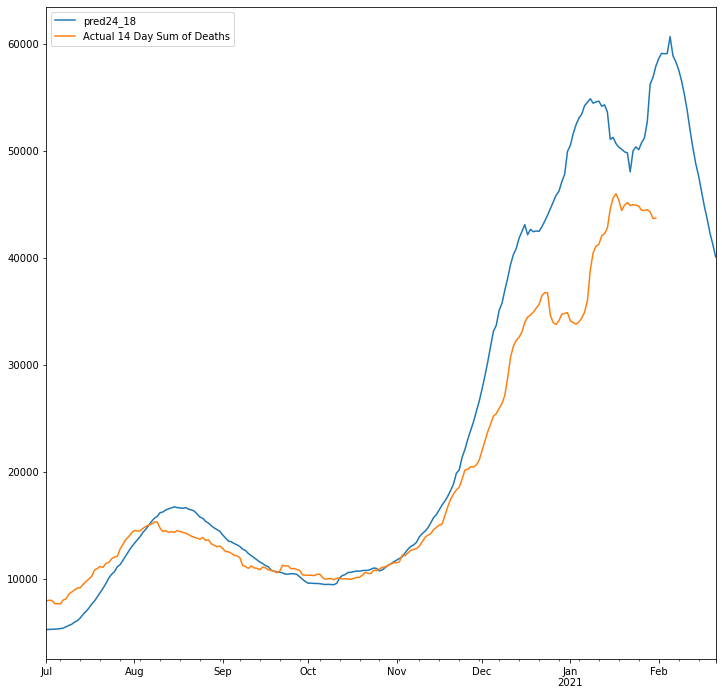

In [25]:
plt.rcParams['figure.figsize'] = [12, 12]
predictions.dropna().loc['2020-07-01':].plot(label='predicted')
final['Rolling14D'].loc['2020-07-01':].plot(label='Actual 14 Day Sum of Deaths')
plt.legend(loc='upper left')
plt.show()


In [26]:
final[['pred24_18','Rolling14D']].tail(14)

,pred24_18,Rolling14D
2021-01-18,50317.326,45381.0
2021-01-19,50131.764,44405.0
2021-01-20,49884.732,44892.0
2021-01-21,49791.834,45145.0
2021-01-22,48015.432,44868.0
2021-01-23,49971.438,44946.0
2021-01-24,50349.564,44897.0
2021-01-25,50082.840,44808.0
2021-01-26,50735.988,44426.0
2021-01-27,51188.796,44405.0


In [27]:
#Cases model predictions next 21 days
from datetime import date
predictions[['pred24_18']].loc[date.today():].head(21)

,pred24_18
2021-02-01,58594.086
2021-02-02,59086.530
2021-02-03,59047.920
2021-02-04,59066.982
2021-02-05,60657.516
2021-02-06,58866.192
2021-02-07,58305.456
2021-02-08,57564.126
2021-02-09,56546.370
2021-02-10,55262.286
